<a href="https://colab.research.google.com/github/saebswaity/iris_dataset/blob/main/Iris_dataset_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:

# i guess this project is better than “Prediction of Product Sales”

In [ ]:
# Cell 1
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()

# Extract features and target variable
X = iris.data
y = iris.target

from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np
from scipy.stats import ortho_group

def einsum_outer_product_matrix(matrix1, matrix2):
    num_rows, num_cols = matrix1.shape
    return np.einsum('ij,ik->ijk', matrix1, matrix2).reshape(num_rows, -1)

def X_feature(X):
    # Standardize the features (normalize to mean=0 and variance=1)
    scaler = StandardScaler()
    XXT = einsum_outer_product_matrix(X, X)
    XXTXT = einsum_outer_product_matrix(XXT, X)
    X_normalized = np.hstack([np.ones((X.shape[0], 1)), X, XXT, XXTXT])

    X_normalized = scaler.fit_transform(X_normalized)
    return X_normalized

def type_2_one_hot(y):
    # Convert target variable 'y' to one-hot encoded vectors
    encoder = OneHotEncoder()
    y_onehot = encoder.fit_transform(y.reshape(-1, 1))
    return y_onehot

def transform_matrix(X, y):
    # Create the matrix A (A = B * inv(X))
    A = np.linalg.pinv(X) @ y
    return A

def matrix_model(A, X):
    # Transform the original data using matrix A
    X_transformed = X @ A
    binary_matrix = np.zeros_like(X_transformed)
    max_indices = np.argmax(X_transformed, axis=1)
    binary_matrix[np.arange(binary_matrix.shape[0]), max_indices] = 1
    return X_transformed, binary_matrix

A = transform_matrix(X_feature(X), type_2_one_hot(y))
X_transformed, binary_matrix = matrix_model(A, X_feature(X))

In [5]:
# Cell 2
from sklearn.metrics import accuracy_score

# Assuming y_true is the true labels and y_pred is the predicted labels
# You may replace these with your actual true and predicted labels
y_true = type_2_one_hot(y)
_, y_pred = matrix_model(A, X_feature(X))

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Display the accuracy
print("Accuracy:", accuracy)


Accuracy: 0.9866666666666667


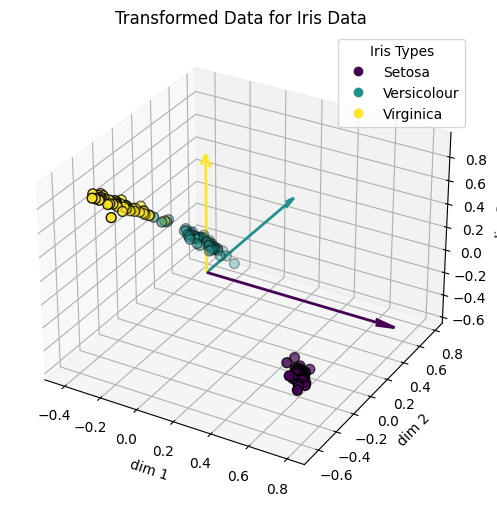

In [3]:
# Cell 3
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming X_transformed is your transformed data and y is your labels

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the first three dimensions after PCA
scatter = ax.scatter(X_transformed[:, 0], X_transformed[:, 1], X_transformed[:, 2], c=y, cmap='viridis', edgecolor='k', s=50)

# Set labels for each axis
ax.set_xlabel('dim 1')
ax.set_ylabel('dim 2')
ax.set_zlabel('dim 3')

# Set a title for the plot
ax.set_title("Transformed Data for Iris Data")

# Add legend
legend_labels = ['Setosa', 'Versicolour', 'Virginica']
ax.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='Iris Types', loc='upper right')

# Add vectors of the identity matrix I3x3
origin = [0, 0, 0]
I3x3 = np.eye(3)

colors = ['red', 'green', 'blue']

for i in range(3):
    color = scatter.to_rgba(i)
    ax.quiver(origin[0], origin[1], origin[2], I3x3[i, 0], I3x3[i, 1], I3x3[i, 2], color=color, linewidth=2, arrow_length_ratio=0.1)

# Display the plot
plt.show()
